# PCA - Particle Classification

## Observing the Dataset

In [2]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('./telescope_data.csv', index_col=0)
df.dropna()
print(df.head())

    fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist class  
0  40.0920   81.8828     g  
1   6.3609  205.2610     g  
2  76.9600  256.7880     g  
3  10.4490  116.7370     g  
4   4.6480  356.4620     g  


In [5]:
# Extract the numerical columns onto a variable named data_matrix and the classes to a variable named classes
classes = df['class']
data_matrix = df.drop(columns='class')

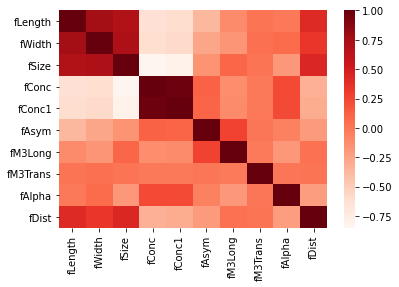

In [8]:
# Create a correlation matrix of the data matrix and show it as a heatmap.

correlation_matrix = data_matrix.corr()

ax = plt.axes()
sns.heatmap(correlation_matrix, cmap='Reds', ax=ax)
plt.show()

In [9]:
# Find the eigenvectors and eigenvalues
eigenvalues, eigenvectors = np.linalg.eig(correlation_matrix)
print(f'Eigenvalues length: {eigenvalues.size}, Original Number of Features: {data_matrix.shape[1]}')

Eigenvalues length: 10, Original Number of Features: 10


In [15]:
# Order the eigenvalues from greatest to smallest by ordering its indices first, and use these indices to also order the eigenvectors
indices = eigenvalues.argsort()[::-1]  
eigenvalues = eigenvalues[indices]
eigenvectors = eigenvectors[:, indices]

print(eigenvalues.shape, eigenvectors.shape)

(10,) (10, 10)


In [16]:
# Find the percentages of information for each eigenvector, which is generated by the proportion of its eigenvalues to the sum of all eigenvalues
information_proportions = eigenvalues / eigenvalues.sum()
information_percents = information_proportions * 100

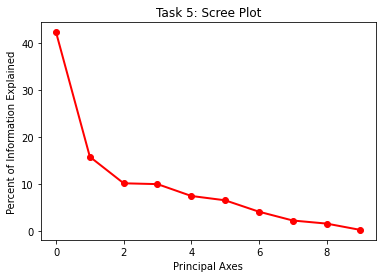

In [17]:
# Plot the principal axes vs the information proportions for each principal axis
plt.figure()
plt.plot(information_percents, 'ro-', linewidth=2)
plt.title('Task 5: Scree Plot')
plt.xlabel('Principal Axes')
plt.ylabel('Percent of Information Explained')
plt.show()

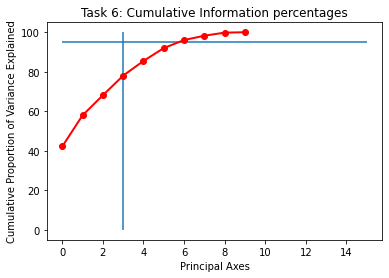

In [19]:
# Find the cumulative sum of the percentages
cumulative_information_percents = np.cumsum(information_percents)

# Plot the cumulative percentages array
plt.figure()
plt.plot(cumulative_information_percents, 'ro-', linewidth=2)

# Also plot a horizontal line indicating the 95% mark, and a vertical line for the third principal axis
plt.hlines(y=95, xmin=0, xmax=15)
plt.vlines(x=3, ymin=0, ymax=100)
plt.title('Task 6: Cumulative Information percentages')
plt.xlabel('Principal Axes')
plt.ylabel('Cumulative Proportion of Variance Explained')
plt.show()

## Performing PCA

In [26]:
# Standardize the data matrix
mean = data_matrix.mean(axis=0)
sttd = data_matrix.std(axis=0)
data_matrix_standardized = (data_matrix - mean) / sttd

In [27]:
# Find the principal components
pca = PCA()
principal_components = pca.fit_transform(data_matrix_standardized)
print(f'Number of features in the data matrix: {principal_components.shape[1]}')
print(f'Number of features in the principal components: {data_matrix.shape[1]}')


Number of features in the data matrix: 10
Number of features in the principal components: 10


In [29]:
# Find the eigenvalues from the singular values
singular_values = pca.singular_values_
eigenvalues = singular_values ** 2
eigenvectors = pca.components_.T


In [30]:
# Get the variance ratios from the `explained_variance_ratio_`
principal_axes_variance_ratios = pca.explained_variance_ratio_
principal_axes_variance_percents = principal_axes_variance_ratios * 100

In [31]:
# Calculating principal components with 2 components
# Initialize a PCA object with 2 components
pca = PCA(n_components=2) 

In [32]:
# Fit the standardized data and calculate the principal components
principal_components = pca.fit_transform(data_matrix_standardized)
 
# Print the DataFrame
print(f'Number of Principal Components Features: {principal_components.shape[1]}')
print(f'Number of Original Data Features: {data_matrix_standardized.shape[1]}')

Number of Principal Components Features: 2
Number of Original Data Features: 10


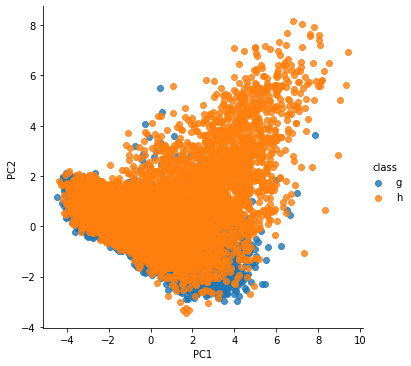

In [34]:
# Plot the principal components as a scatterplot
principal_components_data = pd.DataFrame({
    'PC1': principal_components[:, 0],
    'PC2': principal_components[:, 1],
    'class': classes,
})

sns.lmplot(x='PC1', y='PC2', data=principal_components_data, hue='class', fit_reg=False)
plt.show()

In [35]:
y = classes.astype('category').cat.codes

pca_1 = PCA(n_components=2)

# Use the principal components as X and split the data into 33% testing and the rest training
X = pca_1.fit_transform(data_matrix_standardized) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [37]:
# Create a Linear Support Vector Classifier
svc_1 = LinearSVC(random_state=0, tol=1e-5)
svc_1.fit(X_train, y_train) 

# Generate a score for the testing data
score_1 = svc_1.score(X_test, y_test)
print(f'Score for model with 2 PCA features: {score_1}')

Score for model with 2 PCA features: 0.7417556157400031


c:\Users\Usuario\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Now, we'll fit the classifier with the first two features of the original data matrix and generate a score.

In [38]:
first_two_original_features = [0, 1]
X_original = data_matrix_standardized.iloc[:, first_two_original_features]

In [40]:
# Split the data intro 33% testing and the rest training
X_train, X_test, y_train, y_test = train_test_split(X_original, y, test_size=0.33, random_state=42)

# Create a Linear Support Vector Classifier
svc_2 = LinearSVC(random_state=0)
svc_2.fit(X_train, y_train)
 
# Generate a score for the testing data
score_2 = svc_2.score(X_test, y_test)
print(f'Score for model with 2 randomly selected features: {score_2}')

Score for model with 2 randomly selected features: 0.7192926557272582


c:\Users\Usuario\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Score for model with 2 PCA features: 0.7417556157400031
Score for model with 2 randomly selected features: 0.7192926557272582

**Thus, PCA features preserve more information than any 2 randomly chosen features.**